In [1]:
#%pip install ipywidgets
#%pip install pandas-profiling
#%pip install sweetviz
#%pip install autoviz
#%pip install dtale
#%pip install umap-learn

In [2]:
import pandas as pd
import umap.umap_ as umap
#import sweetviz #usado mais pra dados rotulados
import dtale
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
rootPath = "C:\\Users\\mlb\\Teste_VOCs\\DataFiles"
columnsName = ["0","1","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade"]
columnsName2 = ["index","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade","culture_day","c_type"]

In [5]:
#Load albicans file data
#data dictionary
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6

#Load krusei file data
df_krusei = pd.read_csv(rootPath+"\\krusei.csv", delim_whitespace=True, header=None, names=columnsName)
df_krusei = df_krusei.drop(["0","1"], axis=1)
df_krusei.dropna(inplace=True)
df_krusei.reset_index(drop=True, inplace=True)
df_krusei['c_type'] = 5
df_krusei['culture_day'] = 1

df_krusei2 = pd.read_csv(rootPath+"\\krusei2.csv", delim_whitespace=True, header=None, names=columnsName)
df_krusei2 = df_krusei2.drop(["0","1"], axis=1)
df_krusei2.dropna(inplace=True)
df_krusei2.reset_index(drop=True, inplace=True)
df_krusei2['c_type'] = 5
df_krusei2['culture_day'] = 1

df_krusei3 = pd.read_csv(rootPath+"\\krusei3.csv", delim_whitespace=True, header=None, names=columnsName)
df_krusei3 = df_krusei3.drop(["0","1"], axis=1)
df_krusei3.dropna(inplace=True)
df_krusei3.reset_index(drop=True, inplace=True)
df_krusei3['c_type'] = 5
df_krusei3['culture_day'] = 1

df_krusei_dia2 = pd.read_csv(rootPath+"\\krusei_dia2.csv", delim_whitespace=True, header=None, names=columnsName)
df_krusei_dia2 = df_krusei_dia2.drop(["0","1"], axis=1)
df_krusei_dia2.dropna(inplace=True)
df_krusei_dia2.reset_index(drop=True, inplace=True)
df_krusei_dia2['c_type'] = 5
df_krusei_dia2['culture_day'] = 2

In [6]:
df_krusei.head()

,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,1.623164e+09,75010.0,3814.0,12850.0,32800.0,1855.0,12770.0,7531.0,63.42,100.15,13.03,5,1
1,1.623164e+09,65310.0,3814.0,12780.0,33650.0,1830.0,12780.0,7511.0,63.35,78.83,12.59,5,1
2,1.623164e+09,18480.0,28800.0,12960.0,31920.0,563.5,3123.0,3696.0,63.42,74.26,10.69,5,1
3,1.623164e+09,15540.0,43470.0,12650.0,31020.0,318.1,1766.0,2728.0,63.47,73.99,10.26,5,1
4,1.623164e+09,14890.0,49280.0,12410.0,30480.0,237.1,1317.0,2356.0,63.50,74.26,10.01,5,1


In [7]:
df_krusei.describe()

,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
count,2.389000e+03,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.0,2389.0
mean,1.623165e+09,37241.473420,45330.501465,21113.034743,30621.159481,324.870280,1169.059732,3342.732524,62.012139,76.877032,9.601360,5.0,1.0
std,6.138128e+02,12913.922087,11720.777272,5491.911530,5253.620459,111.720449,569.949251,1100.969620,1.101336,21.291027,2.516869,0.0,0.0
min,1.623164e+09,13300.000000,3814.000000,10890.000000,19430.000000,158.600000,624.200000,1681.000000,60.090000,53.770000,6.210000,5.0,1.0
25%,1.623164e+09,27840.000000,33180.000000,17260.000000,26950.000000,244.200000,775.500000,2473.000000,60.750000,53.920000,6.770000,5.0,1.0
50%,1.623165e+09,33800.000000,48750.000000,19480.000000,30410.000000,282.500000,956.300000,2907.000000,62.700000,74.110000,9.970000,5.0,1.0
75%,1.623165e+09,49090.000000,56370.000000,27400.000000,34240.000000,415.100000,1531.000000,4491.000000,62.890000,100.030000,12.190000,5.0,1.0
max,1.623166e+09,75010.000000,61750.000000,28790.000000,43780.000000,1855.000000,12780.000000,7531.000000,63.620000,100.220000,13.030000,5.0,1.0


In [8]:
#Join the albicans dataframes
frames  = [df_krusei,df_krusei2, df_krusei3, df_krusei_dia2]
df_krusei_joined = pd.concat(frames)
df_krusei_joined.reset_index(inplace=True)
df_krusei_joined

,index,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,0,1.623164e+09,75010.0,3814.0,12850.0,32800.0,1855.0,12770.0,7531.0,63.42,100.15,13.03,5,1
1,1,1.623164e+09,65310.0,3814.0,12780.0,33650.0,1830.0,12780.0,7511.0,63.35,78.83,12.59,5,1
2,2,1.623164e+09,18480.0,28800.0,12960.0,31920.0,563.5,3123.0,3696.0,63.42,74.26,10.69,5,1
3,3,1.623164e+09,15540.0,43470.0,12650.0,31020.0,318.1,1766.0,2728.0,63.47,73.99,10.26,5,1
4,4,1.623164e+09,14890.0,49280.0,12410.0,30480.0,237.1,1317.0,2356.0,63.50,74.26,10.01,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11967,4785,1.623266e+09,55440.0,22180.0,28090.0,32080.0,659.9,2775.0,5835.0,60.61,54.04,6.42,5,2
11968,4786,1.623266e+09,55340.0,22180.0,28050.0,32110.0,662.4,2776.0,5834.0,60.62,54.12,6.56,5,2
11969,4787,1.623266e+09,55660.0,22140.0,28080.0,32130.0,663.7,2778.0,5835.0,60.62,54.08,6.49,5,2
11970,4788,1.623266e+09,55470.0,22150.0,28060.0,32200.0,663.1,2780.0,5838.0,60.61,54.00,6.53,5,2


In [9]:
import dtale
d = dtale.show(df_krusei_joined)
d.open_browser()

In [31]:
d = dtale.show(df_krusei_joined.drop(columns=['c_type','index']))
d.open_browser()

In [10]:
df_krusei_joined.to_csv(r'DatasetsJoined\AllKruseiCollect.csv', index = False)
df_krusei.to_csv(r'NewDatasets\NewKrusei.csv', index = False)
df_krusei2.to_csv(r'NewDatasets\NewKrusei2.csv', index = False)
df_krusei3.to_csv(r'NewDatasets\NewKrusei3.csv', index = False)
df_krusei_dia2.to_csv(r'NewDatasets\NewKrusei_dia2.csv', index = False)

In [11]:
krusei_data = df_krusei_joined.drop(columns=['c_type'])
scaled_krusei_df = StandardScaler().fit_transform(krusei_data)
scaled_krusei_df

array([[-1.41836128, -1.17250598,  2.73208114, ...,  1.09905671,
         1.41823972, -0.81666709],
       [-1.41751491, -1.17241931,  2.02838348, ...,  0.08859171,
         1.24742414, -0.81666709],
       [-1.41666854, -1.17239454, -1.36895278, ..., -0.12800421,
         0.5098114 , -0.81666709],
       ...,
       [ 2.63319833,  1.25059668,  1.32831312, ..., -1.08443872,
        -1.12070098,  1.22448916],
       [ 2.6340447 ,  1.25061022,  1.31452935, ..., -1.08823033,
        -1.10517229,  1.22448916],
       [ 2.63489107,  1.25063738,  1.30509835, ..., -0.53702452,
        -1.12070098,  1.22448916]])

In [12]:
reducer = umap.UMAP()

In [13]:
#Usa os dados reescalonados para a redução de dimensionalidade
embedding = reducer.fit_transform(scaled_krusei_df)
embedding.shape

(11972, 2)

In [14]:
#Usa as classes do array original pra plotar a 
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=[sns.color_palette()[x] for x in df_albicans_joined.c_type])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the C. Albicans dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the C. Kkrusei dataset')

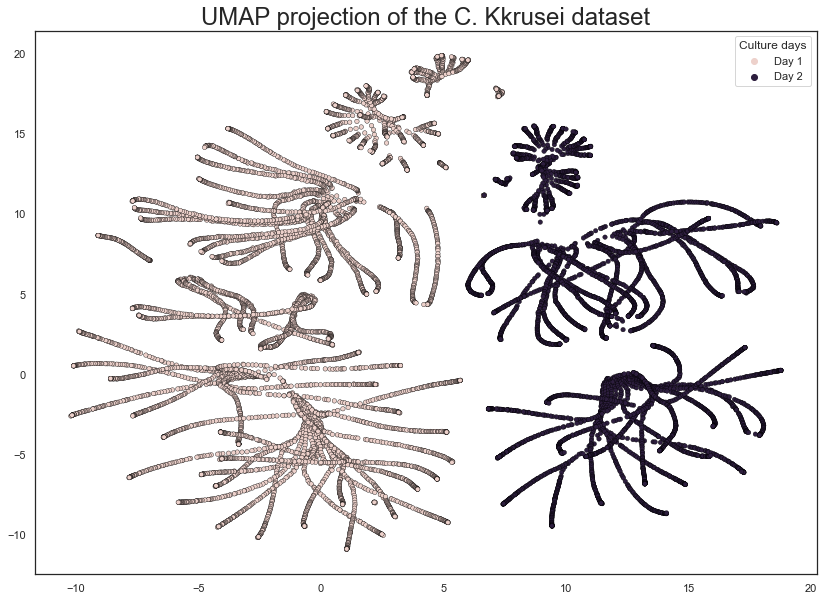

In [16]:
ax = sns.scatterplot(data=embedding, x=embedding[:, 0], y=embedding[:, 1],cmap="RdYlGn_r", s=20, ec='black', hue=df_krusei_joined.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ["Day 1", "Day 2"], loc='upper right', title="Culture days")
plt.title('UMAP projection of the C. Kkrusei dataset', fontsize=24)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_krusei_df)
result = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1','PCA2'])

Text(0.5, 0.92, 'PCA projection of the C. Kkrusei dataset')

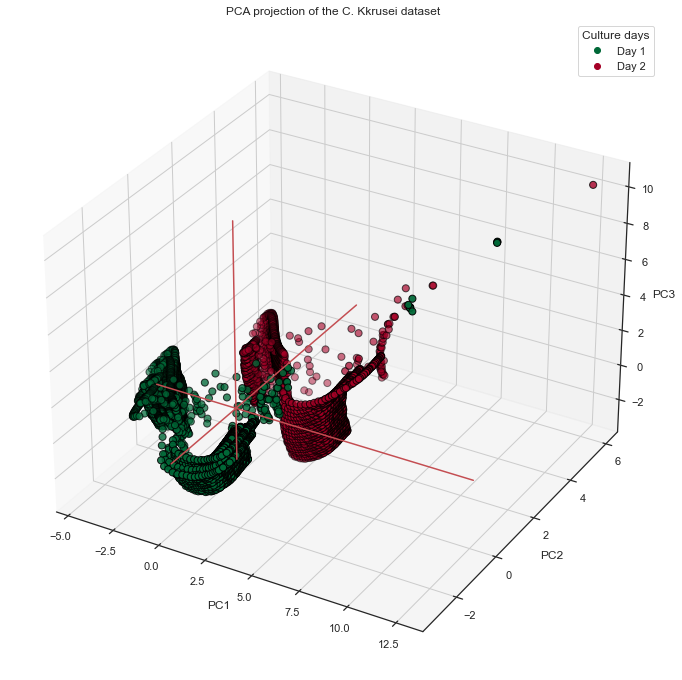

In [18]:
fig = plt.figure(figsize=[15,12])

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=df_krusei_joined.culture_day, cmap="RdYlGn_r", s=50, ec='black')
handles, labels = scatter.legend_elements()
legend2 = ax.legend(handles, ["Day 1","Day 2"], loc="upper right", title="Culture days")

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA projection of the C. Kkrusei dataset")

In [19]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(scaled_krusei_df)
result2 = pd.DataFrame(data = principalComponents2
             , columns = ['PCA0', 'PCA1'])

Text(0.5, 1.0, 'PCA projection of the C. krusei dataset')

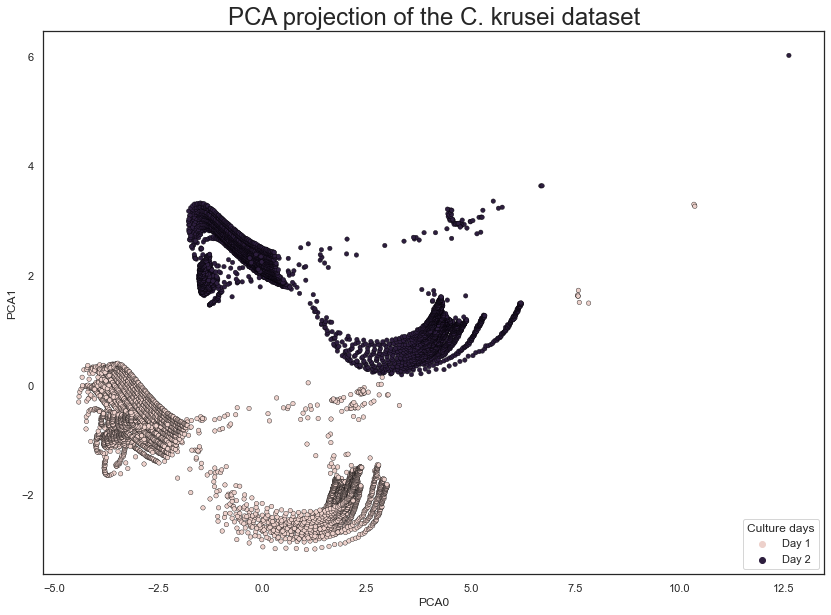

In [21]:
ax = sns.scatterplot(data=result2, x=result2['PCA0'], y=result2['PCA1'],cmap="RdYlGn_r", s=20, ec='black',  hue=df_krusei_joined.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ["Day 1", "Day 2"], loc='lower right', title="Culture days")
plt.title('PCA projection of the C. krusei dataset', fontsize=24)